# Development in the Danish consumer price index 

We are looking into the development in the danish consumer price index and see especially look into the impact the covid crisis had. We have monthly data for 41 sectors and for the total inflation which is in year-to-year inflation changes. 

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("Forbrugerprisindeks.xlsx")
print(df)

#Dropping last row due to missing data
df = df.drop(df.index[-1])

print(df)

     Periode  00 Forbrugerprisindekset i alt  01.1 Fødevarer  \
0    2002M01                             2.5             3.7   
1    2002M02                             2.5             4.0   
2    2002M03                             2.6             3.4   
3    2002M04                             2.6             2.0   
4    2002M05                             2.0             1.7   
..       ...                             ...             ...   
262  2023M11                             0.6             2.9   
263  2023M12                             0.7             1.9   
264  2024M01                             1.2             1.7   
265  2024M02                             0.8            -0.9   
266      NaN                             0.9             NaN   

     01.2 Ikke-alkoholiske drikkevarer  02.1 Alkoholiske drikkevarer  \
0                                  1.5                          -1.7   
1                                  1.6                          -2.1   
2              

In [5]:

# Assuming 'Periode' column contains strings formatted like 'YYYY-QX' or 'YYYYMM'
# Try to extract Year and Quarter or Month
df['Year'] = df['Periode'].str.extract('(\d{4})')  # Extract the year

# Attempt to extract Quarter if present
df['Quarter'] = df['Periode'].str.extract('Q(\d)')

# Check if Quarter extraction was successful, otherwise assume it's a month
if df['Quarter'].isna().any():
    df['Month'] = df['Periode'].str.extract('(\d{2})$')  # Assuming format YYYYMM if no 'Q' present
else:
    # Handle the month as quarter to month conversion if needed
    df['Month'] = df['Quarter'].apply(lambda x: str(int(x) * 3 - 2).zfill(2))  # Convert quarter to starting month

# Combine Year and Month into a Period column and convert to datetime
df['Period'] = pd.to_datetime(df['Year'] + df['Month'], format='%Y%m')
df.set_index('Period', inplace=True)

# Show updated DataFrame
print("Updated DataFrame with datetime index:")
print(df)

Updated DataFrame with datetime index:
            Periode  00 Forbrugerprisindekset i alt  01.1 Fødevarer  \
Period                                                                
2002-01-01  2002M01                             2.5             3.7   
2002-02-01  2002M02                             2.5             4.0   
2002-03-01  2002M03                             2.6             3.4   
2002-04-01  2002M04                             2.6             2.0   
2002-05-01  2002M05                             2.0             1.7   
...             ...                             ...             ...   
2023-10-01  2023M10                             0.1             3.5   
2023-11-01  2023M11                             0.6             2.9   
2023-12-01  2023M12                             0.7             1.9   
2024-01-01  2024M01                             1.2             1.7   
2024-02-01  2024M02                             0.8            -0.9   

            01.2 Ikke-alkoholiske dri

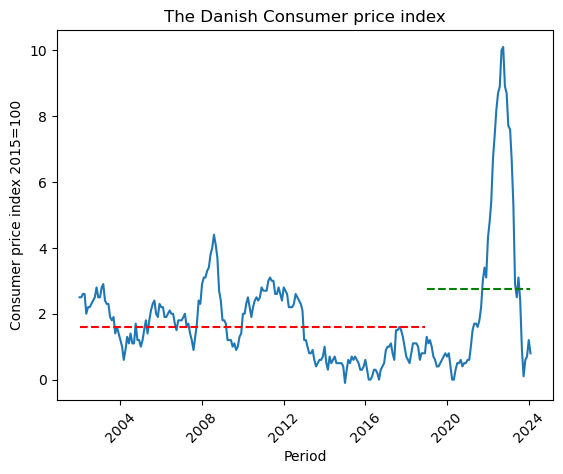

In [52]:
# Plotting the values of the column 00 Forbrugerprisindekset i alt (meaning priceindex in total)
Consumerpriceindex = df['00 Forbrugerprisindekset i alt']
plt.plot(df.index, Consumerpriceindex)

first_period = df[(df.index.year >= 2002) & (df.index.year <= 2018)]
second_period = df[(df.index.year >= 2019) & (df.index.year <= 2024)]


mean_first_period = first_period['00 Forbrugerprisindekset i alt'].mean()
mean_second_period = second_period['00 Forbrugerprisindekset i alt'].mean()

# Plot mean trend lines for each period
plt.hlines(mean_first_period, first_period.index.min(), first_period.index.max(), colors='r', linestyles='--', label=f'Mean 2002-2018: {mean_first_period:.2f}')
plt.hlines(mean_second_period, second_period.index.min(), second_period.index.max(), colors='g', linestyles='--', label=f'Mean 2018-2024: {mean_second_period:.2f}')
plt.title('The Danish Consumer price index') 
plt.xlabel('Period')
plt.ylabel('Consumer price index 2015=100')
plt.xticks(rotation=45)
plt.show()

Here we see that the inflation has been stable for most of the years apart from around the financial crisis and covid crisis, where we see spikes. We see that the average mean is a significantly higher with the covid crisis.

To take a further look we can plot some of the biggest and/or most volitile sectors. We choose "foods", "electricity, gas and others" and "Rent".

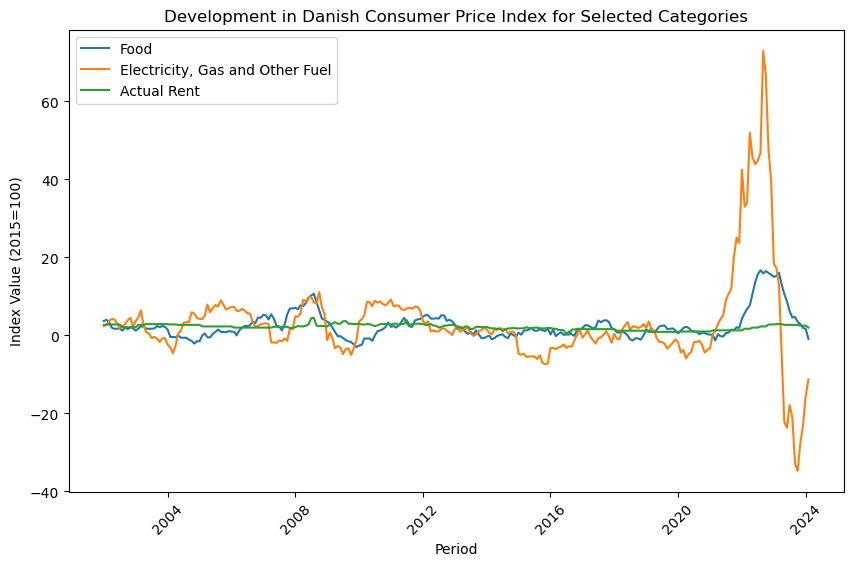

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['01.1 Fødevarer'], label='Food')
plt.plot(df.index, df['04.5 Elektricitet, gas og andet brændsel'], label='Electricity, Gas and Other Fuel')
plt.plot(df.index, df['04.1 Faktisk husleje'], label='Actual Rent')

# Adding plot title and labels
plt.title('Development in Danish Consumer Price Index for Selected Categories')
plt.xlabel('Period')
plt.ylabel('Index Value (2015=100)')

plt.legend()
plt.xticks(rotation=45)

plt.show()

Here we see that rent has been stable in the whole period. On the other side we see that electricity, gas and other has been very versatile, and is very consistent with the result for the overall inflation. 

In [55]:
#import real rate data
df = pd.read_excel("Rente data.xlsx")
print(df)

            DATE  OBS.VALUE
0     2004-09-06   3.457222
1     2004-09-07   3.479518
2     2004-09-08   3.507894
3     2004-09-09   3.430628
4     2004-09-10   3.374729
...          ...        ...
7151  2024-04-05   2.348748
7152  2024-04-06        NaN
7153  2024-04-07        NaN
7154  2024-04-08   2.402902
7155  2024-04-09   2.364642

[7156 rows x 2 columns]


In [56]:

# Clean the 'DATE' column by removing any non-numeric characters like 'C'
df['DATE'] = df['DATE'].str.replace(r'\D', '', regex=True)

# Convert the 'DATE' column to datetime
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')

# Set the 'DATE' as the index of the DataFrame
df.set_index('DATE', inplace=True)

# Resample the data to get the monthly average of 'OBS.VALUE'
df_monthly = df.resample('M').mean()

# Change the format of the index to 'YYYYMM'
df_monthly.index = df_monthly.index.strftime('2004M%m')

# Print the resulting DataFrame
print(df_monthly)

         OBS.VALUE
DATE              
2004M09   3.372940
2004M10   3.220237
2004M11   3.121089
2004M12   2.977029
2004M01   2.967852
...            ...
2004M12   2.070337
2004M01   2.102569
2004M02   2.308056
2004M03   2.355291
2004M04   2.365526

[236 rows x 1 columns]
